# Chi-Squared Goodness of Fit Test For Normality

# Library Imports

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns

# Data

In [ ]:
# reading the data file
df = pd.read_csv("/content/Weights.csv")
df.head()

,Weights
0,18
1,25
2,26
3,27
4,26


In [ ]:
# storing the sample observations in a numpy array
wts = np.array(df.Weights)
wts

array([18, 25, 26, 27, 26, 25, 20, 22, 23, 25, 25, 28, 22, 27, 20, 19, 31,
       26, 27, 25, 24, 21, 29, 28, 22, 24, 26, 25, 25, 24])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


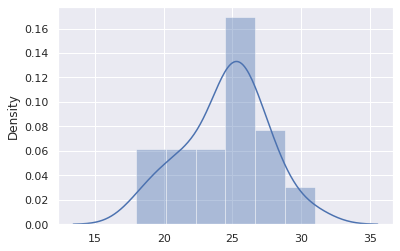

In [ ]:
# visualizing the data
sns.set_theme()
sns.distplot(wts)

# Bins and Frequencies

In [ ]:
# calculating the sample statistics
sampleMean, sampleStdDev =  wts.mean(), wts.std(ddof = 1)
print(sampleMean, sampleStdDev)

24.5 3.0143335742003945


In [ ]:
# creating 10 bins for the data
# calculating the bounds
numBins = 10
bins = [-float("inf")]
for i in range(0, numBins - 1):
  # cumulative relative frequency upto this point
  cf = (i + 1) / 10
  # corresponding z-value
  z = st.norm.ppf(cf)
  # corresponding upper bound
  bound = sampleMean + z * sampleStdDev
  bins.append(bound)
  print(cf, z, bound)
bins.append(float("inf"))
bins

0.1 -1.2815515655446004 20.636976088909833
0.2 -0.8416212335729142 21.963072858881212
0.3 -0.5244005127080409 22.91928192821625
0.4 -0.2533471031357997 23.73632732109135
0.5 0.0 24.5
0.6 0.2533471031357997 25.26367267890865
0.7 0.5244005127080407 26.080718071783746
0.8 0.8416212335729143 27.036927141118788
0.9 1.2815515655446004 28.363023911090167


[-inf,
 20.636976088909833,
 21.963072858881212,
 22.91928192821625,
 23.73632732109135,
 24.5,
 25.26367267890865,
 26.080718071783746,
 27.036927141118788,
 28.363023911090167,
 inf]

In [ ]:
# calculating observed frequencies
obsF = []
for i in range(0, numBins):
  obsF.append(sum(x >= bins[i] and x < bins[i + 1] for x in wts))

# calculating expected frequencies
# same for each bin
expF = wts.size / numBins

print(obsF)
print(expF)

[4, 1, 3, 1, 3, 7, 4, 3, 2, 2]
3.0


# Chi-Squared Test

In [ ]:
# calculating the critical chisq value
alpha = 0.05
critical = st.chi2.ppf(1 - alpha, numBins - 2 - 1)
critical

14.067140449340169

In [ ]:
# calculating the chisq value
chisq = sum((obs - expF) ** 2 / expF for obs in obsF)

# calculating the p-value
pValue = 1 - st.chi2.cdf(chisq, numBins - 2 - 1)

print(chisq, pValue)

9.333333333333334 0.229601649193794


In [ ]:
# hypothesis testing
print("Null Hypothesis: Given distr in normal with mean = {mean} and std dev = {stdDev}.".format(
    mean = sampleMean, stdDev = sampleStdDev
))
print("Alternative Hypothesis: Not normal with given mean and std dev.")

if (pValue <= alpha):
  print("Null hypothesis rejected.")
else:
  print("Null hypothesis not rejected.")

Null Hypothesis: Given distr in normal with mean = 24.5 and std dev = 3.0143335742003945.
Alternative Hypothesis: Not normal with given mean and std dev.
Null hypothesis not rejected.
